# Quantum Computation - Week 6

&nbsp;

## Contents

&nbsp;

1. [Quantum Fourier Transform](#qft)

&nbsp;

2. [Quantum period finding](#qpf)

&nbsp;

3. [25th of April Revolution assignments](#25apr)

&nbsp;


## 1. Quantum Fourier Transform<a id='qft'></a>

&nbsp;

The quantum Fourier transform is analogue to the discrete Fourier transform (DFT). Similarly to the classical case, it is a very useful mathematical tool, and a building block in many quantum algorithms, such as quantum phase estimation, computing the discrete logarithm, and Shor's algorithm for factoring.

&nbsp;

### (Classical) Fourier Transform

In modern science and engineering, the Fourier transform is essential for signal processing and communications.

The FT allows us to extract the underlying periodic behaviour of a function, by decomposing it into its constituent frequencies.

&nbsp;

<div class="alert alert-block alert-info">

**Example: Fourier transform for signal processing**

&nbsp;

<img src="img/ft.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="300 px" align="center">

<sup>**a)** Take a sinusoidal signal with high frequency noise; **b)** Apply the Fourier transform, getting a frequency spectrum; **c)** After the high-frequency components are removed, the inverse Fourier transform may be applied to give a clean set of data.</sup>

</div>

&nbsp;

### Discrete Fourier Transform

The DFT is a version of the Fourier transform that works on discrete data sets.

The discrete Fourier transform, $\tilde{f}$ of a discrete function, $f = f_1 , \cdots, f_N$ is given by

$$ \tilde{f}_k \equiv \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} e^{2\pi ijk/N} f_j$$

The inverse Fourier transform is expressed as

$$ f_j \equiv \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} e^{-2\pi ijk/N} \tilde{f}_k$$

With $f_j$ and $\tilde{f}_k$ being complex numbers, and indices $j, k \in \{0, 1, \cdots, N-1\}$

&nbsp;

<div class="alert alert-block alert-warning">
    
**Exercise**

&nbsp;
    
- Given $f_j = \{1, 2\}$, use the DFT to calculate $\tilde{f}_k$ .

</div>
    
    

In [ ]:
# Answer

#


### Quantum Fourier tranform

Qubit states are represented by vectors of complex numbers, so it makes sense that the DFT can be applied to them.

Given a state vector:

$$ | \psi \rangle = \sum^{N-1}_{j=0} a_j |j\rangle = \begin{pmatrix}
a_0\\ 
\vdots\\ 
a_{N-1}
\end{pmatrix}$$

The DFT (which we will now call the quantum Fourier transform, or QFT) can be computed over the _amplitudes_ of the quantum state

$$ \sum_j \alpha_j |j\rangle \rightarrow \sum_k \tilde{\alpha}_k |k \rangle$$ where:

$$\tilde{\alpha}_k \equiv \frac{1}{\sqrt{N}} \sum^{N-1}_{j=0} e^{2\pi ijk/N} \alpha_k$$

&nbsp;

We observe that the amplitudes $\tilde{\alpha}_k$ are linear in the original $\alpha_j$. So there is a linear operator $\hat{F}$ which implements the transform.

We can write the matrix $\hat{F}$ in outer product notation:

&nbsp;

$$\hat{F} = \sum_{j,k=0}^{N-1} \frac{e^{2\pi ijk/N}}{\sqrt{N}} |k \rangle \langle j |$$

&nbsp;

The Fourier transform lets us define a new basis $|\hat{x}\rangle = \hat{F}|x\rangle$, where $\{ |x\rangle\}$ is the usual computational basis - every vector $|\hat{x}\rangle$ is an equally weighted superposition of all the computational basis states.

&nbsp;

<div class="alert alert-block alert-info">
    
**Position and Momentum**: 

&nbsp;

* From earlier classes, recall the change of basis for a single-qubit state. What operation may be performed to change it between the computational and superposition basis?

&nbsp;

* The Hadamard transform also turns computational basis states into equally weighted superpositions of all states. But it leaves all amplitudes real, while the amplitudes of $| \tilde{x}\rangle$ are complex. And it is its own inverse, while $\hat{F} \neq \hat{F}^\dagger$

&nbsp;

* In physics, the relationship of this basis to the computational basis is analogous to that between the _momentum_ and _position_ bases of a particle.

    
</div>

### QFT in the quantum circuit model of computation

&nbsp;

For the case of $n$ qubits, the vector describing a quantum state has dimension $N=2^n$. Since the QFT is an unitary operator, it can be implemented in a quantum circuit. Although there is no guarantee that such a circuit would be efficient (i.e. would not scale exponentially with the number of qubits), an efficient circuit _does_ exist.

&nbsp;

The key is to notice that the states $| \hat{j} \rangle$ can be written in a product form:

* Let the binary expression for $j$ be $j_1 j_2 \cdots j_n$, where:

$$ j = j_1 2^{n-1} \, +\, j_2 2^{n-2} \,+\, \cdots \,+\, j_n$$

* Admit the following notation for binary fractions:

$$ 0.j_1 j_2 \cdots j_n = j_1 /2 + j_2 /4 + \cdots + j_n /2^n$$

* Then the state $|\hat{j} \rangle$ can be written as:

$$ |\hat{j} \rangle  = \frac{1}{2^n/2} (|0\rangle + e^{2\pi i 0.j_n }| 1\rangle) \, \otimes \, (|0\rangle + e^{2\pi i 0.j_{n-1}j_n }| 1\rangle) \, \otimes \, \cdots \, \otimes \, (|0\rangle + e^{2\pi i 0.j_1j_2\cdots j_n }| 1\rangle)$$

&nbsp;

A unitary that performs the transformation

$$ |0\rangle \rightarrow \frac {1}{\sqrt{2}}(|0\rangle + e^{i\theta}|1\rangle) \; ;\; |1\rangle \rightarrow \frac {1}{\sqrt{2}}(|0\rangle - e^{i\theta}|1\rangle)$$

may be decomposed into an Hadamard gate followed by a $Z$-rotation by $\theta$.

**However**, in the expression above, the rotation depends on the values of other bits. We can expect to build the QFT out of Hadamards and controlled-phase rotation gates.

&nbsp;

<img src="img/qft_circ.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="700 px" align="center">

&nbsp;



In [ ]:
# THEORETIC INPUT STATE (FIGURE ABOVE)
|q1 q2 q3 q4>

# QISKIT INPUT STATE
|q3 q2 q1 q0>

<div class="alert alert-block alert-danger">

**Attention**

* In the figure above, notice the order of the input qubits (in comparison with Qiskit's circuit drawer);

* Notice how after the QFT, the qubits of the transformed state are in reverse order. What can be done to correct this?

</div>

&nbsp;

<div class="alert alert-block alert-info">
    
**Controlled phase rotation in Qiskit**

In Qiskit, the phase rotation gate, $u1(\lambda)$, is defined as:

$$u1(\lambda) = \begin{pmatrix} 1 & 0\\ 0 & e^{i\lambda} \end{pmatrix}$$

Admit $\lambda = 2\pi/2^k$ so that we can define a rotation operator:

$$R_k = \begin{pmatrix} 1 & 0\\ 0 & e^{2\pi i /2^k} \end{pmatrix}$$

The controlled-$R_k$ gate performs this rotation only if a control qubit is $|1\rangle$ rather than $|0\rangle$:

$$CR_k = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & e^{2\pi i /2^k} \end{pmatrix}$$


&nbsp;

A controlled-$u1$ gate may be implemented in Qiskit with the instruction `cu1(theta, ctrl, trg)`.
</div>

#### Module imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile

from qiskit.tools.visualization import plot_histogram

#IBMQ.load_account()

import math
from math import pi

In [2]:
# Plot results
def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()

# Execute circuit, display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: \n\n", result_counts)
    show_results(result_counts)

<div class="alert alert-block alert-warning">

**Exercise - implementing the QFT**

&nbsp;

1. Implement a function `qftransform (circuit, qr, swap=True)` to perform the QFT over a register `qr`. The function should be able to ignore the swapping operations at the end when called with `swap=False`.

&nbsp;

2. How many controlled-$R_k$ gates are performed as a function of qubit number $n$? Does the circuit scale efficiently?

</div>

In [ ]:
def qftransform(circuit, qr, swap=True):



    
# Test the implementation

qr=QuantumRegister(4)
qc=QuantumCircuit(qr)

qftransform(qc, qr)

qc.draw(output='mpl', scale=1)


## 2. Quantum period finding<a id='qpf'></a>

&nbsp;

Admit a function $f(x)$ from $n$-bit numbers to $m$-bit numbers. Consider $f(x)$ periodic of period $r$, meaning that $\forall x \in \{0,\cdots,N-r-1\}$, we have that $f(x) = f(x+r)$ and the values $f(x), f(x+1), \cdots, f(x+r-1)$ are all distinct. Suppose also that $ r \leq \sqrt{N}/2$


In a quantum algorithm, this function translates to an $n$-qubit input register and an $m$-qubit output register. We can prepare in the state:

$$ | \psi_0 \rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{2^n-1} | x\rangle |0\rangle$$

Using $n$ Hadamard gates.

We then apply a circuit that performs the unitary $\hat{U}_f$:

$$\hat{U}_f | \psi_0 \rangle =\frac{1}{\sqrt{N}} \sum_{x=0}^{2^n-1} | x\rangle | f(x) \rangle$$

If we measure the output register _only_ , we get a particular value $a$. The input register will be left in an evenly-weighted superposition of all $x$ such that $f(x) = a$:

$$\frac{1}{\sqrt{N/r}} \sum_{n=0}^{N/r-1} |x_0 + nr \rangle | a \rangle$$

From now on, we will ignore the output register since the measurement has fixed its state.

If we apply the QFT to the input register, we will gate a state in the form:

$$\sum_{m=0}^{r-1} \alpha_m |m N/r\rangle$$

If we now measure the input register, we would get one value $mN/r$, for some random $m$ between $0$ and $r-1$.

* This is not enough to tell us the value of $N/r$, but if we run the algorithm $d$ times, we will get a sequence of integers $m_1 N/r, \cdots, m_d N/r$ which are all multiples of $N/r$.


## 3. 25th April assignments<a id='25apr'></a>

&nbsp;

<div class="alert alert-block alert-warning">

**Assignment A**

&nbsp;

Implement the inverse QFT `iqftransform (circuit, qr, swap=True)`

&nbsp;

Notes:
   * the Hadamard and SWAP gates are self invertible;
   * the inverse of a Rotation gate is achieved by performing the rotation in the symmetric direction;

</div>

<div class="alert alert-block alert-warning">

**Assignment B**

&nbsp;

Using the period finding technique detailed above, find the period of the function $f:\{0,1\}^3 \rightarrow \{0,1\}^3$ below.

&nbsp;

Notes:

* For a sufficiently large number of runs $d$ (which grows moderately in $N$) we can be confident that, with high probability, $N/r$ is the only common factor of all the numbers.


</div>

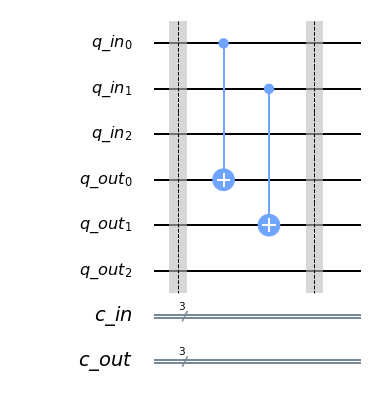

In [3]:
qin = QuantumRegister(3, 'q\_in')
qout = QuantumRegister(3, 'q\_out')
cin = ClassicalRegister(3, 'c\_in')
cout = ClassicalRegister(3, 'c\_out')
qc = QuantumCircuit(qin, qout, cin, cout)



qc.barrier()

qc.cx(qin[0],qout[0])
qc.cx(qin[1],qout[1])

qc.barrier()


qc.draw(output='mpl')

<div class="alert alert-block alert-warning">

**Random Assignment Generator**

</div>

In [ ]:
# Resolucao - Tomas Sousa

# '00' - Assignment A, '01' - Assignment B, '11' - Assignment C
assignment = {'00' : 'A', '11' : 'B'}
# init quantum state
init_state = np.array([1, 0, 0, 1]) * 1/np.sqrt(2)

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

qc.initialize(init_state, [qr[0], qr[1]])
qc.measure(qr, cr)

# Assignee name 
assignees = ['Ana Filipa Carvalho','Marco Barbosa','António Pereira','José Guimarães','Alexandra Alves','Mafalda Alves','José Marques','José Martins','Tomás Sousa']

# Counter 

counter = {'A':0, 'B':0}

for i in range(len(assignees)):
    
    if (len(assignment) == 1):
        print(assignees[i]+ ' gets assignment ' + list(assignment)[0] + '\n')
        
    else:
        backend = Aer.get_backend('qasm_simulator')
        job = execute(qc, backend, shots=1)
        qc_state = job.result().get_counts(qc)
        #print(qc_state)
        state_string = list(qc_state.keys())[0]
        counter[assignment[state_string]] = counter.get(assignment[state_string],0) + 1

        while (counter[assignment[state_string]] > 5):
            backend = Aer.get_backend('qasm_simulator')
            job = execute(qc, backend, shots=1)
            qc_state = job.result().get_counts(qc)
            state_string = list(qc_state.keys())[0]
            counter[assignment[state_string]] = counter.get(assignment[state_string],0) + 1

        print(assignees[i]+ ' gets assignment ' + assignment[state_string] + '\n')